importing packages

In [137]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import nsepy as ny

Reading the data from the excel and convertig it into a data frame

In [116]:
df=pd.read_excel("price.xlsx")
df

,MONTH,PRICE
0,2015-01-01,RS.3000
1,2015-02-01,NaN
2,2015-03-01,RS.6000
3,2015-04-01,RS.3500
4,2015-05-01,RS.2000
...,...,...
67,2020-08-01,Rs.5500
68,2020-09-01,Rs.4000
69,2020-10-01,RS.5000
70,2020-11-01,RS.6000


# Data Analysis

removing the null values using dropna

In [117]:
df=df.dropna()
df

,MONTH,PRICE
0,2015-01-01,RS.3000
2,2015-03-01,RS.6000
3,2015-04-01,RS.3500
4,2015-05-01,RS.2000
5,2015-06-01,RS.4500
...,...,...
67,2020-08-01,Rs.5500
68,2020-09-01,Rs.4000
69,2020-10-01,RS.5000
70,2020-11-01,RS.6000


 above output is the dataframe without null value row

# Removing - (RS.)  USING SPLIT 

 
 removing the string RS.from the PRICE attribute and placing the result in the new attribute price using the split fumction and converting it into a string.

In [118]:
df["price"]=df["PRICE"].apply(lambda x: int(x.split(".")[1]))
df

C:\Users\Kamesh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MONTH,PRICE,price
0,2015-01-01,RS.3000,3000
2,2015-03-01,RS.6000,6000
3,2015-04-01,RS.3500,3500
4,2015-05-01,RS.2000,2000
5,2015-06-01,RS.4500,4500
...,...,...,...
67,2020-08-01,Rs.5500,5500
68,2020-09-01,Rs.4000,4000
69,2020-10-01,RS.5000,5000
70,2020-11-01,RS.6000,6000


Above dataset shows that a new column is created with only integers omitting the string.


# Removing previous PRICE column.

In [120]:
new_df=df.drop(columns=["PRICE"])
new_df

,MONTH,price
0,2015-01-01,3000
2,2015-03-01,6000
3,2015-04-01,3500
4,2015-05-01,2000
5,2015-06-01,4500
...,...,...
67,2020-08-01,5500
68,2020-09-01,4000
69,2020-10-01,5000
70,2020-11-01,6000


 RESET INDEX:
 
     After removing the null value row,the index will not be in sequence.TO make it align in a sequence we have done reset_index.
 
     

In [199]:
new_df=new_df.reset_index
new_df

,index,MONTH,price
0,0,2015-01-01,3000.0
1,2,2015-03-01,6000.0
2,3,2015-04-01,3500.0
3,4,2015-05-01,2000.0
4,5,2015-06-01,4500.0
...,...,...,...
62,67,2020-08-01,5500.0
63,68,2020-09-01,4000.0
64,69,2020-10-01,5000.0
65,70,2020-11-01,6000.0


Method to remove negative value:
    
       get_correct_price_alone is a user defined to chech whether the price value is positive or negative.
       If it is positive it returns the price value else it returns nothing.
        

In [200]:
def get_correct_price_alone(price):
    if price>0:
        return price

creating a new dataframe and storing only the positive values .

In [201]:
new_df["price"]=new_df["price"].apply(get_correct_price_alone)
new_df

,index,MONTH,price
0,0,2015-01-01,3000.0
1,2,2015-03-01,6000.0
2,3,2015-04-01,3500.0
3,4,2015-05-01,2000.0
4,5,2015-06-01,4500.0
...,...,...,...
62,67,2020-08-01,5500.0
63,68,2020-09-01,4000.0
64,69,2020-10-01,5000.0
65,70,2020-11-01,6000.0


drop command is used to remove the empty row which returns none due to a negative value.

In [203]:
new_df=new_df.dropna()
new_df

,index,MONTH,price
0,0,2015-01-01,3000.0
1,2,2015-03-01,6000.0
2,3,2015-04-01,3500.0
3,4,2015-05-01,2000.0
4,5,2015-06-01,4500.0
...,...,...,...
62,67,2020-08-01,5500.0
63,68,2020-09-01,4000.0
64,69,2020-10-01,5000.0
65,70,2020-11-01,6000.0


NOW, We are plotting the values in the graph by taking the two variables month and price.

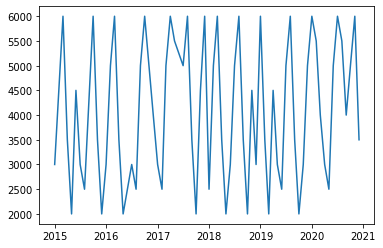

In [204]:
plt.plot(new_df['MONTH'],new_df['price'])
plt.show()

The above graph indicates that the month in the specific year hits the profit if the line keeps on increasing.If it decreases it denotes that the month attains a loss value.

 Now, we are finding the difference between the two months and using the if condition to check whether the specific month assigned a profit or loss or no change.

#DETERMINING THE RESULT

In [223]:
review_list=["no change"]
diff_list=[0]
for ind in new_df.index: 
    if ind==0:
        continue
    ans=new_df["price"][ind]-new_df["price"][ind-1]
    diff_list.append(ans)
    if ans>0:
        review_list.append("profit")
    elif ans==0:
        review_list.append("no change")
    else:
        review_list.append("loss")
review_list

['no change',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'profit',
 'loss',
 'loss',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'profit',
 'loss',
 'loss',
 'loss',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'profit',
 'profit',
 'loss']

The above result shows the result of each month.

In [227]:
df7=pd.DataFrame(review_list,columns =['Review'])
df7
df8=pd.DataFrame(diff_list,columns=['Difference'])


,Difference
0,0.0
1,3000.0
2,-2500.0
3,-1500.0
4,2500.0
...,...
62,-500.0
63,-1500.0
64,1000.0
65,1000.0


Next step is to calculate the amount of profit and loss of each month.

In [230]:
new_df["Review"]=df7["Review"]
new_df["Difference"]=df8["Difference"]
new_df

,index,MONTH,price,Review,Difference
0,0,2015-01-01,3000.0,no change,0.0
1,2,2015-03-01,6000.0,profit,3000.0
2,3,2015-04-01,3500.0,loss,-2500.0
3,4,2015-05-01,2000.0,loss,-1500.0
4,5,2015-06-01,4500.0,profit,2500.0
...,...,...,...,...,...
62,67,2020-08-01,5500.0,loss,-500.0
63,68,2020-09-01,4000.0,loss,-1500.0
64,69,2020-10-01,5000.0,profit,1000.0
65,70,2020-11-01,6000.0,profit,1000.0


Plotting the graph by taking years along x-axis and difference value along y -axis.

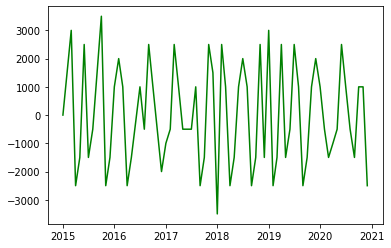

In [246]:
plt.plot(new_df['MONTH'],new_df['Difference'],"g")

The above graph shows the level of profit  attained by each month of the specific years.The height specifies the level of profit attained.

Next, we are using two variables supper and slower.np.ma.masked is used to separte and show uniquely.

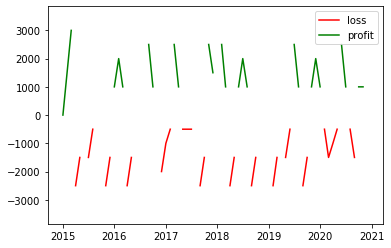

In [271]:
supper = np.ma.masked_where(new_df['Difference']>=0, new_df['Difference'])
slower = np.ma.masked_where(new_df['Difference']<0, new_df['Difference'])

plt.plot(new_df["MONTH"], supper,"r",label="loss")
plt.plot(new_df["MONTH"], slower,"g",label="profit")

plt.legend()

The final graph shows the the profit attained by the month in the green colour and loss in red colour.